# TensorFlow的分类器模型构建(监督学习)--归一化
使用数据集-> Fashion Mnist

In [9]:
import os
from tensorflow import keras
import tensorflow as tf
import sklearn
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# 这串代码让图像直接显示在Notebook里而不是单独打开一个窗口
%matplotlib inline

In [18]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train_all, y_train_all), (x_test, y_test) = fashion_mnist.load_data()

# 训练集 验证集
x_valid, x_train = x_train_all[:5000], x_train_all[5000:]
y_valid, y_train = y_train_all[:5000], y_train_all[5000:]

# 归一化前的max和min
print(np.max(x_train), np.min(x_train))

255 0


## 数据归一化
### 原理
> $x = \frac{x - u} {std}$  
  > 其中u 是均值， std 是方差
### sklearn的归一化函数
首先用`StandardScaler()`创建一个对象  
再调用它的方法`.fit_transorm()`  
因为这个函数的参数接受只`[样本数 , 特征]`所以我们要先reshape它  
- StandardScaler()类的transform要求如下:  
> Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.  

**x_train: [None , 28 , 28] ->[None , 784]**

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(
    x_train.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)
x_valid_scaled = scaler.transform(
    x_valid.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)
x_test_scaled = scaler.transform(
    x_test.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)

# 归一化后的max和min
print(np.max(x_train_scaled), np.min(x_train_scaled))

2.0231433 -0.8105136


In [26]:
model = tf.keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(50, activation='sigmoid'),
    keras.layers.Dense(10, activation="softmax")
])

In [27]:
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='sgd',
    metrics=["accuracy"]
)

In [28]:
history = model.fit(x_train_scaled, y_train,
                    epochs=10,
                    validation_data=(x_valid_scaled, y_valid)
                    )

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 5s 88us/sample - loss: 0.9077 - accuracy: 0.7303 - val_loss: 0.5853 - val_accuracy: 0.8132
Epoch 2/10
55000/55000 [==============================] - 5s 84us/sample - loss: 0.5338 - accuracy: 0.8219 - val_loss: 0.4714 - val_accuracy: 0.8446
Epoch 3/10
55000/55000 [==============================] - 5s 83us/sample - loss: 0.4553 - accuracy: 0.8436 - val_loss: 0.4260 - val_accuracy: 0.8534
Epoch 4/10
55000/55000 [==============================] - 5s 86us/sample - loss: 0.4136 - accuracy: 0.8550 - val_loss: 0.3905 - val_accuracy: 0.8646
Epoch 5/10
55000/55000 [==============================] - 5s 94us/sample - loss: 0.3861 - accuracy: 0.8647 - val_loss: 0.3792 - val_accuracy: 0.8664
Epoch 6/10
55000/55000 [==============================] - 5s 91us/sample - loss: 0.3662 - accuracy: 0.8723 - val_loss: 0.3663 - val_accuracy: 0.8706
Epoch 7/10
55000/55000 [==============================] -

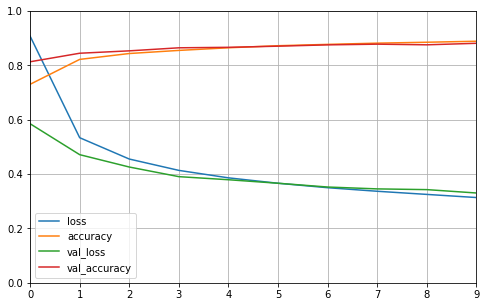

In [29]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()


plot_learning_curves(history)

In [31]:
#使用测试集验证模型的准确度
model.evaluate(x_test_scaled, y_test)

10000/10000 [==============================] - 0s 37us/sample - loss: 0.3632 - accuracy: 0.8717


[0.36322683815956114, 0.8717]